#Appendix A: R Code

#Load in libraries

In [186]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


#Load in sales dataset

In [187]:
#Loading in Sales_data 3

musei = pd.read_csv('/content/drive/MyDrive/Documents/Data Mining/DMI- Assignment 1/sales_data 3.csv') 

#Exploring the sales dataset

In [188]:
musei.info() #exploring the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flag         40000 non-null  object
 1   gender       40000 non-null  object
 2   education    39259 non-null  object
 3   house_val    40000 non-null  int64 
 4   age          40000 non-null  object
 5   online       40000 non-null  object
 6   marriage     25973 non-null  object
 7   child        40000 non-null  object
 8   occupation   40000 non-null  object
 9   mortgage     40000 non-null  object
 10  house_owner  36623 non-null  object
 11  region       40000 non-null  object
 12  fam_income   40000 non-null  object
dtypes: int64(1), object(12)
memory usage: 4.0+ MB


In [189]:
musei.head(10) #exploring the first 10 observation of the dataset

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,M,4. Grad,756460,1_Unk,N,NaN,U,Professional,1Low,NaN,Midwest,L
1,N,F,3. Bach,213171,7_>65,N,NaN,U,Professional,1Low,Owner,Northeast,G
2,N,M,2. Some College,111147,2_<=25,Y,NaN,Y,Professional,1Low,Owner,Midwest,J
3,Y,M,2. Some College,354151,2_<=25,Y,Single,U,Sales/Service,1Low,NaN,West,L
4,Y,F,2. Some College,117087,1_Unk,Y,Married,Y,Sales/Service,1Low,NaN,South,H
5,Y,F,3. Bach,248694,6_<=65,Y,Married,N,Professional,2Med,Owner,West,G
6,Y,M,3. Bach,2000000,1_Unk,Y,Married,U,Professional,1Low,NaN,Northeast,C
7,N,F,3. Bach,416925,5_<=55,Y,Married,Y,Professional,1Low,Owner,South,I
8,N,F,1. HS,207676,4_<=45,Y,NaN,Y,Blue Collar,1Low,Renter,West,D
9,Y,M,1. HS,241380,1_Unk,Y,Married,U,Sales/Service,1Low,NaN,Northeast,G


In [190]:
educ_nan_count = musei['education'].isna().sum()#Number of missing values in education column
marr_nan_count = musei['marriage'].isna().sum()#Number of missing values in marriage column
ho_nan_count = musei["house_owner"].isna().sum()#Number of missing values in house_owner column

In [191]:
# Printing the number of missing values in education column
# Printing the number of missing values in marriage column
# Printing the number of missing values in house_owner column

print("The number of values missing from the education column is: " + str(educ_nan_count))
print("The number of values missing from the marriage column is: " + str(marr_nan_count))
print("The number of values missing from the house_owner column is: " + str(ho_nan_count))

The number of values missing from the education column is: 741
The number of values missing from the marriage column is: 14027
The number of values missing from the house_owner column is: 3377


#Checking each variable to explore and check for data quality issues. 

1. First, the gender variable is analysed

In [192]:
gend= musei['gender'].value_counts() #checking summary of gender variable
print(gend)

M    22019
F    16830
U     1151
Name: gender, dtype: int64


Text(0, 0.5, 'gender')

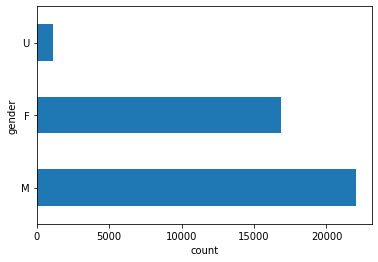

In [193]:
musei.gender.value_counts().plot.barh() #plotting the gender variable for more detailed exploration
plt.xlabel('count')
plt.ylabel('gender')

2. Second, the education variable is analysed

In [194]:
educ= musei['education'].value_counts() #checking summary of gender variable
print(educ)

2. Some College    11400
3. Bach             9267
1. HS               8828
4. Grad             5916
0. <HS              3848
Name: education, dtype: int64


Text(0, 0.5, 'education')

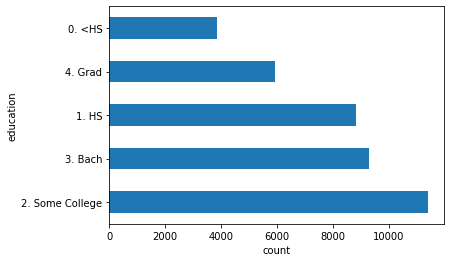

In [195]:
musei.education.value_counts().plot.barh() #plotting the education variable for more detailed exploration
plt.xlabel('count')
plt.ylabel('education')

3. Third, the  child variable is analysed

In [196]:
chd = musei['child'].value_counts() #checking summary of child variable
print(chd)

Y    18012
N    13333
U     8528
0      127
Name: child, dtype: int64


Text(0, 0.5, 'child')

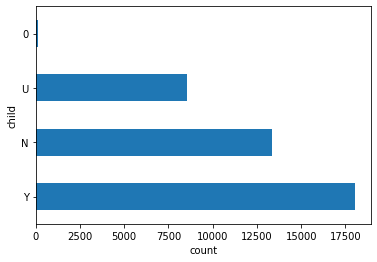

In [197]:
musei.child.value_counts().plot.barh() #plotting the child variable for more detailed exploration
plt.xlabel('count')
plt.ylabel('child')

4. Fourth, the  marriage variable is analysed

In [198]:
marr = musei['marriage'].value_counts() #checking summary of marriage variable
print(marr)

Married    20891
Single      5082
Name: marriage, dtype: int64


Text(0, 0.5, 'marriage')

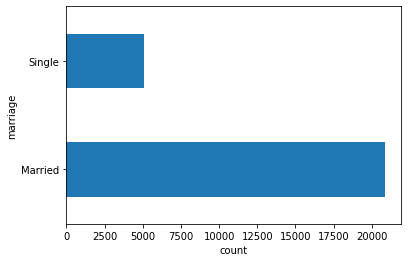

In [199]:
musei.marriage.value_counts().plot.barh() #plotting the marriage variable for more detailed exploration
plt.xlabel('count')
plt.ylabel('marriage')

5. Fifth, the  house_value variable is analysed

In [200]:
hv = musei['house_val'].value_counts() #checking summary of house_val variable
print(hv)

0          7696
1000000      96
1500000      51
2000000      36
294300       29
           ... 
232394        1
75962         1
297631        1
734006        1
213596        1
Name: house_val, Length: 19572, dtype: int64


6. Sixth, the  Age variable is analysed

In [201]:
ag = musei['age'].value_counts() #checking summary of age variable
print(ag)

5_<=55    8103
4_<=45    7115
1_Unk     6709
6_<=65    5907
3_<=35    4984
7_>65     4822
2_<=25    2360
Name: age, dtype: int64


Text(0, 0.5, 'age')

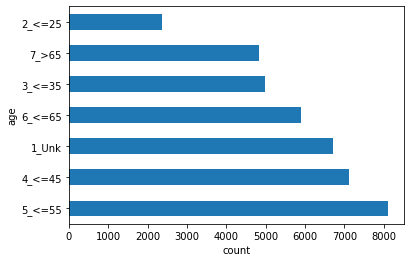

In [202]:
musei.age.value_counts().plot.barh() #plotting the age variable for more detailed exploration
plt.xlabel('count')                  #There are 7 different age group in the dataset
plt.ylabel('age')

#Data Cleaning. 

Gender

In [203]:
musei['gender'] = musei['gender'].replace('M', 0)#Replacing 'M' with 0 for Male gender 
musei['gender'] = musei['gender'].replace('F', 1)#Replacing 'F' with 1 for Female
musei['gender'] = musei['gender'].replace('U', 2)#Replacing 'U' with 2 for Unknown which could be Transgender or 'prefer not to answer'
gend_final = musei['gender'].value_counts()
print(gend_final)

0    22019
1    16830
2     1151
Name: gender, dtype: int64


Education

In [204]:
#Replacing the 741 missing values in education column with the modal value

mode_educ = musei['education'].mode()[0]                 
musei['education'] = musei['education'].fillna(mode_educ)

In [205]:
#mapping of education as ordinal variable

mus_education_mapping = {'0. <HS':0, '1. HS': 1, '2. Some College': 2, '3. Bach': 3, '4. Grad': 4}
musei['education'] =musei['education'].map(mus_education_mapping)
musei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   flag         40000 non-null  object
 1   gender       40000 non-null  int64 
 2   education    40000 non-null  int64 
 3   house_val    40000 non-null  int64 
 4   age          40000 non-null  object
 5   online       40000 non-null  object
 6   marriage     25973 non-null  object
 7   child        40000 non-null  object
 8   occupation   40000 non-null  object
 9   mortgage     40000 non-null  object
 10  house_owner  36623 non-null  object
 11  region       40000 non-null  object
 12  fam_income   40000 non-null  object
dtypes: int64(3), object(10)
memory usage: 4.0+ MB


House_val

In [206]:
#Counting the number of zeros in house_val

count = (musei['house_val'] == 0).sum()                         
print('The number of zeros in house_val column is : ', count)

The number of zeros in house_val column is :  7696


In [207]:
musei['house_val'].median() #Finding the median value of the house_val column

214872.0

In [208]:
##Replacing the zeros with the median of the house_val column

musei['house_val'].replace(0,musei['house_val'].median())

0        756460
1        213171
2        111147
3        354151
4        117087
          ...  
39995    214872
39996    213596
39997    134070
39998    402210
39999    836030
Name: house_val, Length: 40000, dtype: int64

Age

In [209]:
#mapping of age as ordinal variable

mus_age_mapping = {'1_Unk':1, '2_<=25': 2, '3_<=35': 3, '4_<=45': 4, '5_<=55': 5, '6_<=65': 6, '7_>65': 7}
musei['age'] =musei['age'].map(mus_age_mapping)

Online

In [210]:
musei['online'] = musei['online'].replace("N", 0)                 #encoding the online variable
musei['online'] = musei['online'].replace("Y", 1)

Marriage

In [211]:
mode_marriage = musei['marriage'].mode()[0]
musei['marriage'] = musei['marriage'].fillna(mode_marriage)       #Replacing the missing values with mode

In [212]:
musei['marriage'] = musei['marriage'].replace("Single", 0)        #Replacing single with 0
musei['marriage'] = musei['marriage'].replace("Married", 1)       #Replacing married with 1

Child

In [213]:
#Replaced the child variable response and merged 0 to 'unknown'

musei['child'] = musei['child'].replace({'0': 'Unknown', 'N': 'No', 'U': 'Unknown', 'Y': 'Yes'})

In [214]:
musei['child'] = musei['child'].replace("No", 0)                      #encoded 'No' to 0
musei['child'] = musei['child'].replace("Yes", 1)                     #encoded 'Yes' to 1
musei['child'] = musei['child'].replace("Unknown", 2)                 #encoded 'Unknown' to 2

Occupation

In [215]:
musei['occupation'] = musei['occupation'].replace('Farm', 0)            #Replacing 'Farm' with 0
musei['occupation'] = musei['occupation'].replace('Retired', 1)        #Replacing 'Retired' with 1
musei['occupation'] = musei['occupation'].replace('Blue Collar', 2)    #Replacing 'Blue Collar' with 2
musei['occupation'] = musei['occupation'].replace('Sales/Service', 3)  #Replacing 'Sales/Service' with 3
musei['occupation'] = musei['occupation'].replace('Professional', 4)   #Replacing 'Professional' with 4
musei['occupation'] = musei['occupation'].replace('Others', 5)         #Replacing 'Farm' with 5

Mortgage

In [216]:
 #mapping of mortgage as numeric variable

mus_mortgage_mapping = {'1Low':1, '2Med':2, '3High':3}                
musei['mortgage'] =musei['mortgage'].map(mus_mortgage_mapping)

House owner

In [217]:
mode_house_owner = musei['marriage'].mode()[0]
musei['house_owner'] = musei['house_owner'].fillna(mode_house_owner)   #Replacing the missing values with mode

In [218]:
musei['house_owner'] = musei['house_owner'].replace("Renter", 0)   #Replacing Renter with 0 i.e. to numeric
musei['house_owner'] = musei['house_owner'].replace("Owner", 1)    #Replacing Owner with 1 i.e. to numeric

Region

In [219]:
musei['region'] = musei['region'].replace("South", 0)         #Replacing South with 0 i.e. to numeric
musei['region'] = musei['region'].replace("West", 1)          #Replacing West with 1 i.e. to numeric
musei['region'] = musei['region'].replace("Midwest", 2)       #Replacing Midwest with 2 i.e. to numeric
musei['region'] = musei['region'].replace("Northeast", 3)     #Replacing Northeast with 3 i.e. to numeric
musei['region'] = musei['region'].replace("Rest", 4)          #Replacing Rest with 4 i.e. to numeric

Family income

In [220]:
#mapping of age variable

mus_family_income_mapping = {'U':1, 'L': 2, 'K': 3, 'J': 4, 'I': 5, 'H': 6, 'G': 7, 
                             'F': 8, 'E': 9, 'D': 10, 'C': 11, 'B': 12, 'A': 13}
musei['fam_income'] =musei['fam_income'].map(mus_family_income_mapping)               

#Visualisations

<AxesSubplot:xlabel='flag', ylabel='age'>

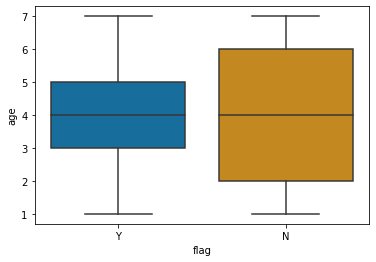

In [221]:
#Boxplot showing age group who will opt and not opt for a life insurance product
#with an average mean age 45 years (i.e age group 4)

sb.boxplot(x='flag',y='age',data=musei, palette='colorblind')
                                                              

<AxesSubplot:xlabel='flag', ylabel='child'>

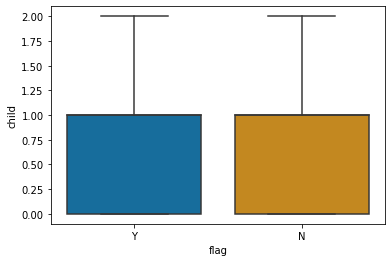

In [222]:
#Boxplot showing even distribution of child variable
#who opt and not opt for a life insurance product

sb.boxplot(x='flag',y='child',data=musei, palette='colorblind')  
                                                                 

<AxesSubplot:xlabel='region', ylabel='occupation'>

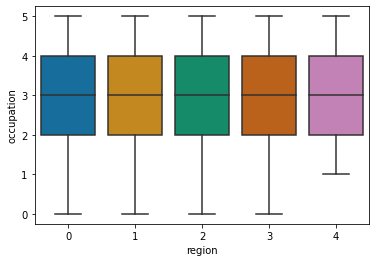

In [223]:
#The bivariate relationship between region and occupation

sb.boxplot(x='region',y='occupation',data=musei, palette='colorblind')

<AxesSubplot:xlabel='flag', ylabel='gender'>

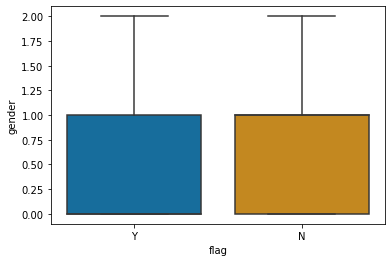

In [224]:
#The bivariate result show that male and female gender are evenly distributed

sb.boxplot(x='flag',y='gender',data=musei, palette='colorblind')

Text(0, 0.5, 'Occurence')

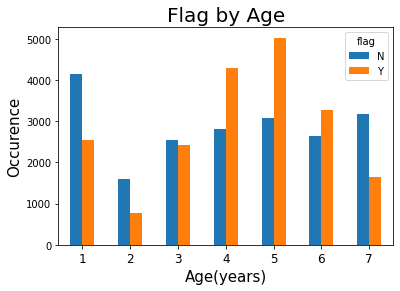

In [225]:
#Barchat showing the distributioin of education variable with flag
#Those in a group 5 (<=55) go for the life insurance product
#While age group 2 (<=25) are the least patronage of the life insurance product

pd.crosstab(musei.age,musei.flag).plot(kind='bar') 
plt.xticks(rotation=360, fontsize=12)              
plt.title('Flag by Age', fontsize=20)
plt.xlabel('Age(years)', fontsize=15)
plt.ylabel('Occurence', fontsize=15)

Text(0, 0.5, 'Occurence')

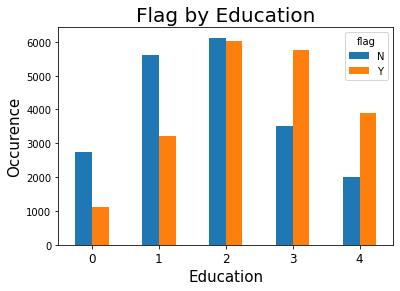

In [226]:
#Barchat showing the distributioin of education variable with flag

pd.crosstab(musei.education,musei.flag).plot(kind='bar')   
plt.xticks(rotation=360, fontsize=12)
plt.title('Flag by Education', fontsize=20)
plt.xlabel('Education', fontsize=15)
plt.ylabel('Occurence', fontsize=15)

Text(0, 0.5, 'house_val')

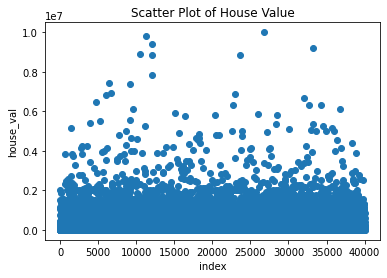

In [227]:
#Scatter plot showing the spread of the house_val variable

plt.scatter(musei.index, musei['house_val']) 
plt.title('Scatter Plot of House Value')
plt.xlabel('index')
plt.ylabel('house_val')

#Measures of Association

In [228]:
mus_corr = pd.DataFrame(musei)                                                   #Correlation matrix of the predictors
corr_matrix = musei.corr()
print(corr_matrix)

               gender  education  house_val       age    online  marriage  \
gender       1.000000  -0.100791  -0.076044 -0.064150 -0.077823 -0.023338   
education   -0.100791   1.000000   0.237863  0.068124  0.206466  0.051941   
house_val   -0.076044   0.237863   1.000000  0.067946  0.127037  0.122543   
age         -0.064150   0.068124   0.067946  1.000000  0.158649  0.171767   
online      -0.077823   0.206466   0.127037  0.158649  1.000000  0.169052   
marriage    -0.023338   0.051941   0.122543  0.171767  0.169052  1.000000   
child        0.005021  -0.001692  -0.022602 -0.254462 -0.118371 -0.103286   
occupation   0.010062   0.282588   0.157311 -0.231376  0.106521 -0.011196   
mortgage    -0.095254   0.216122   0.334950  0.013873  0.165092  0.133382   
house_owner -0.075194   0.122856   0.166290  0.174076  0.213718  0.311012   
region      -0.002449   0.016457   0.008236  0.006646  0.026636 -0.037631   
fam_income   0.110416  -0.310840  -0.393631 -0.086916 -0.241759 -0.179340   

In [229]:
mus_rds = np.random.RandomState(0)                      #correlation matrix heatmap showing the relationships between variables
mus = pd.DataFrame(mus_rds.rand(10, 10))
mus_corr = musei.corr()
mus_corr.style.background_gradient(cmap='YlGnBu').set_precision(2)
#https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

<ipython-input-229-8bd6240eec1d>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  mus_corr.style.background_gradient(cmap='YlGnBu').set_precision(2)


,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
gender,1.00,-0.10,-0.08,-0.06,-0.08,-0.02,0.01,0.01,-0.10,-0.08,-0.00,0.11
education,-0.10,1.00,0.24,0.07,0.21,0.05,-0.00,0.28,0.22,0.12,0.02,-0.31
house_val,-0.08,0.24,1.00,0.07,0.13,0.12,-0.02,0.16,0.33,0.17,0.01,-0.39
age,-0.06,0.07,0.07,1.00,0.16,0.17,-0.25,-0.23,0.01,0.17,0.01,-0.09
online,-0.08,0.21,0.13,0.16,1.00,0.17,-0.12,0.11,0.17,0.21,0.03,-0.24
marriage,-0.02,0.05,0.12,0.17,0.17,1.00,-0.10,-0.01,0.13,0.31,-0.04,-0.18
child,0.01,-0.00,-0.02,-0.25,-0.12,-0.10,1.00,0.09,0.05,-0.10,-0.01,-0.01
occupation,0.01,0.28,0.16,-0.23,0.11,-0.01,0.09,1.00,0.19,0.05,-0.01,-0.24
mortgage,-0.10,0.22,0.33,0.01,0.17,0.13,0.05,0.19,1.00,0.26,-0.03,-0.35
house_owner,-0.08,0.12,0.17,0.17,0.21,0.31,-0.10,0.05,0.26,1.00,-0.02,-0.25


Correlation matrix show weak correlation between some variables, while there are strong negative correlation between variables.

#Classification

In [230]:
#checking if the target variable(flag) is equally distributed)
#As can be seen in the output below, it is equally split therefore no need to downsample or oversample

musei.flag.value_counts()                     

Y    20000
N    20000
Name: flag, dtype: int64

In [231]:
#importing MixMaxScaler from sklearn
#importing StandardScaler from sklearn

from sklearn.preprocessing import MinMaxScaler          
from sklearn.preprocessing import StandardScaler       


In [232]:
 #scaling house_val using StandardScaler

scaler = StandardScaler()
musei[['house_val']]= scaler.fit_transform( musei[['house_val']] )          
print (musei)

      flag  gender  education  house_val  age  online  marriage  child  \
0        Y       0          4   1.064037    1       0         1      2   
1        N       1          3  -0.222740    7       0         1      2   
2        N       0          2  -0.464383    2       1         1      1   
3        Y       0          2   0.111170    2       1         0      2   
4        Y       1          2  -0.450314    1       1         1      1   
...    ...     ...        ...        ...  ...     ...       ...    ...   
39995    Y       1          3  -0.727634    7       1         1      2   
39996    N       1          1  -0.221733    4       0         1      2   
39997    Y       0          0  -0.410090    3       1         1      2   
39998    N       0          1   0.224998    7       1         1      1   
39999    N       1          3   1.252498    7       1         1      0   

       occupation  mortgage  house_owner  region  fam_income  
0               4         1            1       2

In [233]:
#scaling house_val using MinMaxScalerScaler
#MinMaxScaler performed better than StandardScaler
#Therefore MinMaxScaler will be used for scaling house_val
#because it is the only variable which is not in the same dimension

scaler = MinMaxScaler()                                                  
musei[['house_val']]= scaler.fit_transform( musei[['house_val']] )       
print (musei)                                                            

      flag  gender  education  house_val  age  online  marriage  child  \
0        Y       0          4   0.075646    1       0         1      2   
1        N       1          3   0.021317    7       0         1      2   
2        N       0          2   0.011115    2       1         1      1   
3        Y       0          2   0.035415    2       1         0      2   
4        Y       1          2   0.011709    1       1         1      1   
...    ...     ...        ...        ...  ...     ...       ...    ...   
39995    Y       1          3   0.000000    7       1         1      2   
39996    N       1          1   0.021360    4       0         1      2   
39997    Y       0          0   0.013407    3       1         1      2   
39998    N       0          1   0.040221    7       1         1      1   
39999    N       1          3   0.083603    7       1         1      0   

       occupation  mortgage  house_owner  region  fam_income  
0               4         1            1       2

In [234]:
musei.head(10)        #Table showing the cleaned version of the first 10 observations for the dataset

,flag,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
0,Y,0,4,0.075646,1,0,1,2,4,1,1,2,2
1,N,1,3,0.021317,7,0,1,2,4,1,1,3,7
2,N,0,2,0.011115,2,1,1,1,4,1,1,2,4
3,Y,0,2,0.035415,2,1,0,2,3,1,1,1,2
4,Y,1,2,0.011709,1,1,1,1,3,1,1,0,6
5,Y,1,3,0.024869,6,1,1,0,4,2,1,1,7
6,Y,0,3,0.200000,1,1,1,2,4,1,1,3,11
7,N,1,3,0.041693,5,1,1,1,4,1,1,0,5
8,N,1,1,0.020768,4,1,1,1,2,1,0,1,10
9,Y,0,1,0.024138,1,1,1,2,3,1,1,3,7


In [235]:
musei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   flag         40000 non-null  object 
 1   gender       40000 non-null  int64  
 2   education    40000 non-null  int64  
 3   house_val    40000 non-null  float64
 4   age          40000 non-null  int64  
 5   online       40000 non-null  int64  
 6   marriage     40000 non-null  int64  
 7   child        40000 non-null  int64  
 8   occupation   40000 non-null  int64  
 9   mortgage     40000 non-null  int64  
 10  house_owner  40000 non-null  int64  
 11  region       40000 non-null  int64  
 12  fam_income   40000 non-null  int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 4.0+ MB


In [236]:
musei.describe()   #Descriptive statistics of the cleaned dataset

,gender,education,house_val,age,online,marriage,child,occupation,mortgage,house_owner,region,fam_income
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,0.478300,2.114375,0.030721,4.113800,0.682975,0.872950,0.883050,3.066450,1.387525,0.815225,1.191500,8.173825
std,0.554154,1.189844,0.042221,1.932742,0.465323,0.333033,0.732145,1.115018,0.710501,0.388120,1.156616,2.733212
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.008066,3.000000,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,7.000000
50%,0.000000,2.000000,0.021487,4.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,9.000000
75%,1.000000,3.000000,0.039376,6.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,2.000000,10.000000
max,2.000000,4.000000,1.000000,7.000000,1.000000,1.000000,2.000000,5.000000,3.000000,1.000000,4.000000,13.000000


Three classification models will be used for the prediction, namely;

      1. Logistics Regression(LR)
      2. Random Forest(RF)
      3. Support Vector Classifier(SVC)

In [237]:
from sklearn.linear_model import LogisticRegression          #Importing logistic regression function from sklearn
from sklearn.ensemble import RandomForestClassifier          #Importing RandomForestClassifier function from sklearn
from sklearn.svm import SVC                                  #Importing Support Vector Classifier function from sklearn

#Functions for splitting data to train/test, including cross validation                                                
from sklearn.model_selection import train_test_split, cross_val_score   
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import StratifiedKFold

####Logistics Regression

In [238]:
#Defining x and y

x = musei.drop('flag', axis=1)                    
y = musei.flag                                              

# implementing train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)    


In [239]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# converting the response variable to numeric. 
# Did not convert initially in order to easily identify the class in its categorical state when plotting

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


mus_logreg = LogisticRegression()                              # Logistics Regression function
mus_logreg.fit(x_train, y_train)                               # fitting the train data
y_pred = mus_logreg.predict(x_test)                            # Prediction of the LR model

# calculating the accuracy and AUC
LR_accuracy = round(mus_logreg.score(x_train, y_train)* 100,2)
auc_LR = roc_auc_score(y_test, y_pred)

print("LR accuracy:", LR_accuracy)
print("AUC:", auc_LR)

LR accuracy: 67.42
AUC: 0.6862338831861169


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [240]:
#Generating confusion matrix for logistics regression

cm_lr = confusion_matrix(y_test, y_pred)                              
print(cm_lr)

[[2748 1305]
 [1206 2741]]


####Random Forest

In [241]:
# converting the response variable to numeric. 
# Did not convert initially in order to easily identify the class in its categorical state when plotting

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# fit model and make predictions
mus_rf = RandomForestClassifier(n_estimators=100) 
mus_rf.fit(x_train, y_train) 
Y_pred = mus_rf.predict(x_test)

# calculating the accuracy and AUC
RF_accuracy = round(mus_rf.score(x_train, y_train) * 100, 2)
auc_RF = roc_auc_score(y_test, y_pred)

print("RF accuracy:", RF_accuracy)
print("AUC:", auc_RF)

RF accuracy: 99.53
AUC: 0.6862338831861169


In [242]:
#Generating confusion matrix for Random Forest

cm_rf = confusion_matrix(y_test, y_pred)                                     
print(cm_rf)

[[2748 1305]
 [1206 2741]]


####Support vector Machine

In [243]:
# converting the response variable to numeric. 
# Did not convert initially in order to easily identify the class in its categorical state when plotting

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


mus_svc = SVC()                                                      # Support Vector Machine function
mus_svc.fit(x_train, y_train)                                        # fitting the train data
y_pred = mus_svc.predict(x_test)                                     # Prediction of SVC model

# calculating the accuracy and AUC
SVC_accuracy = round(mus_svc.score(x_train, y_train) * 100, 2)       
auc_SVC = roc_auc_score(y_test, y_pred)

print("SVC accuracy:", SVC_accuracy)
print("AUC:", auc_SVC)

SVC accuracy: 68.0
AUC: 0.6791507959116072


In [244]:
#Generating confusion matrix for Support Vector Classifier

cm_svc = confusion_matrix(y_test, y_pred)                                           
print(cm_svc)

[[2630 1423]
 [1147 2800]]
